In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()

In [1]:
import analysis
import random
import numpy as np

In [2]:
dataset_dict = {"HCV":(["A", "B", "C", "D"], [1, 2, 3, 2]),
               "HCV_1":(["A", "B", "C", "D"], [6, 4, 5, 2]),
               "HCV_2":(["A", "B", "C", "D"], [10, 2, 8, 2])}
print(dataset_dict)

{'HCV': (['A', 'B', 'C', 'D'], [1, 2, 3, 2]), 'HCV_1': (['A', 'B', 'C', 'D'], [6, 4, 5, 2]), 'HCV_2': (['A', 'B', 'C', 'D'], [10, 2, 8, 2])}


0.4


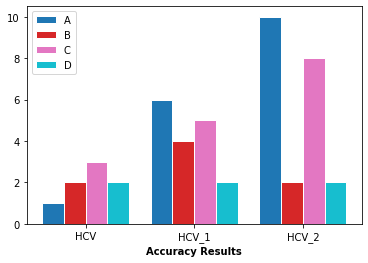

In [3]:
analysis.plot_barchart(dataset_dict)

In [4]:
dataset = "../Results/lr_0.005_epoch_2000_stop_300_gc_[20,20,20,]_do_0.0_ad_10_ab_3_fc_[20,]_m_gcn_cheby_deg_3.protease_HCV_selector_8_ang_ratio_0_params_3.{}.csv"
#dataset = "../Results/learningrate_0.01_epochs_600__graphconv_[10,10,]_dropout_0.0_attdim_10_attbias_3_fc_[]_model_gcn_cheby_maxdeg_3.train_protease_HCV_selector_8_ang_ratio_0_params_3_test_protease_HCV_A171T_selector_8_ang_ratio_0_params_3.{}.csv"
att = dataset.format("attentions")
pred = dataset.format("predictions")
epoch = dataset.format("epoch")
silent_dir = "/mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRosetta/HCV"

In [5]:
analysis.classification_report(pred)

              precision    recall  f1-score   support

     CLEAVED      0.890     0.998     0.941       567
   UNCLEAVED      0.999     0.957     0.978      1636

    accuracy                          0.968      2203
   macro avg      0.945     0.978     0.959      2203
weighted avg      0.971     0.968     0.968      2203



0.9677712210621879

Normalized confusion matrix
[[0.99823633 0.00176367]
 [0.04278729 0.95721271]]


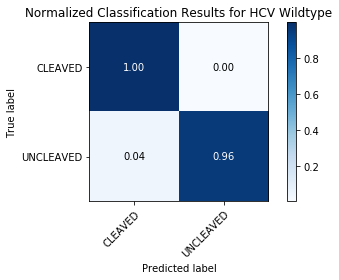

In [6]:
analysis.plot_confusion_matrix(pred, normalize = True, title = "Normalized Classification Results for HCV Wildtype")

In [7]:
analysis.attention_average(att, pred, silent_dir, 0)

PyRosetta-4 2019 [Rosetta PyRosetta4.conda.linux.CentOS.python36.Release 2019.19+release.5adc612fd9dee20f808a07e761610d95698b0f35 2019-05-10T09:04:00] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.CentOS.python36.Release r221 2019.19+release.5adc612f 5adc612fd9dee20f808a07e761610d95698b0f35 http://www.pyrosetta.org 2019-05-10T09:04:00
core.init: command: PyRosetta -ex1 -ex2aro -database /home/samuelstentz/.conda/envs/pyrosetta/lib/python3.6/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=1682265532 seed_offset=0 real_seed=1682265532
core.init.random: RandomGenerator:init: Normal mode, seed=1682265532 RG_type=mt19937
core.io.silent.SilentFileData: Reading all structures from /mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRos

FileNotFoundError: [Errno 2] File b'../Results/lr_0.005_epoch_2000_stop_300_gc_[20,20,20,]_do_0.0_ad_10_ab_3_fc_[20,]_m_gcn_cheby_deg_3.protease_HCV_selector_8_ang_ratio_0_params_3.attentions.csv' does not exist: b'../Results/lr_0.005_epoch_2000_stop_300_gc_[20,20,20,]_do_0.0_ad_10_ab_3_fc_[20,]_m_gcn_cheby_deg_3.protease_HCV_selector_8_ang_ratio_0_params_3.attentions.csv'

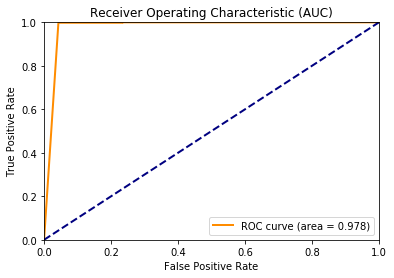

0.9782312001138407

In [8]:
analysis.plot_auc(pred)

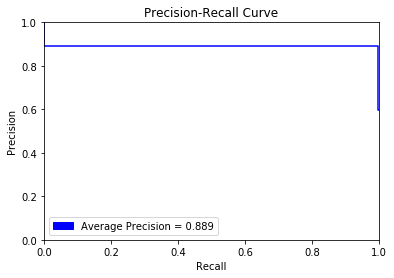

0.8894201845167309

In [9]:
analysis.plot_aupr(pred)

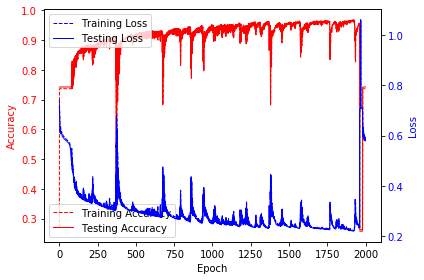

In [10]:
analysis.plot_progression(epoch)

In [11]:
analysis.attention_command(att, silent_dir, "ADVDARC.ASHL", 0)

PyRosetta-4 2019 [Rosetta PyRosetta4.conda.linux.CentOS.python36.Release 2019.19+release.5adc612fd9dee20f808a07e761610d95698b0f35 2019-05-10T09:04:00] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.CentOS.python36.Release r221 2019.19+release.5adc612f 5adc612fd9dee20f808a07e761610d95698b0f35 http://www.pyrosetta.org 2019-05-10T09:04:00
core.init: command: PyRosetta -ex1 -ex2aro -database /home/samuelstentz/.conda/envs/pyrosetta/lib/python3.6/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=1115382034 seed_offset=0 real_seed=1115382034
core.init.random: RandomGenerator:init: Normal mode, seed=1115382034 RG_type=mt19937
Silent file for ADVDARC.ASHL not found /mnt/c/Users/Owner/Documents/Code/Research_Scripts/PyRosetta/HCV/ADVD__C.ASH

AttributeError: 'str' object has no attribute 'num_chains'

              precision    recall  f1-score   support

     CLEAVED      0.947     0.521     0.672      3644
   UNCLEAVED      0.844     0.989     0.911      9564

    accuracy                          0.860     13208
   macro avg      0.895     0.755     0.792     13208
weighted avg      0.873     0.860     0.845     13208

Normalized confusion matrix
[[0.52140505 0.47859495]
 [0.01118779 0.98881221]]


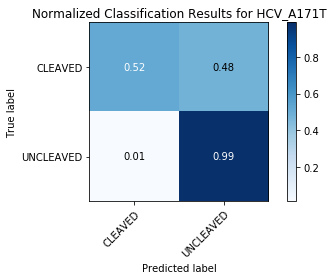

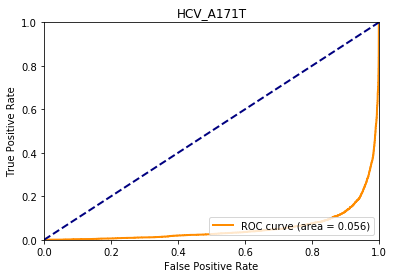

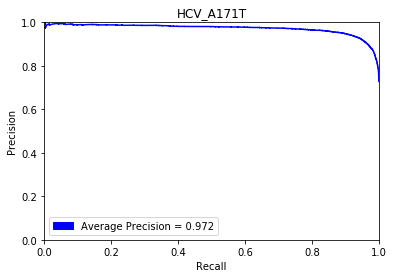

              precision    recall  f1-score   support

     CLEAVED      0.868     0.754     0.807      3135
   UNCLEAVED      0.813     0.903     0.855      3703

    accuracy                          0.835      6838
   macro avg      0.840     0.829     0.831      6838
weighted avg      0.838     0.835     0.833      6838

Normalized confusion matrix
[[0.75406699 0.24593301]
 [0.09694842 0.90305158]]


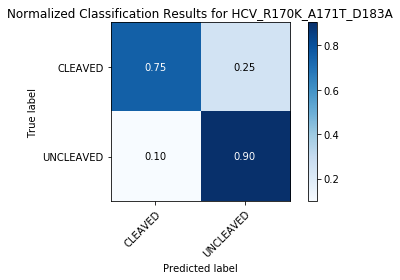

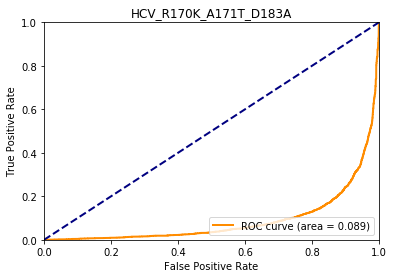

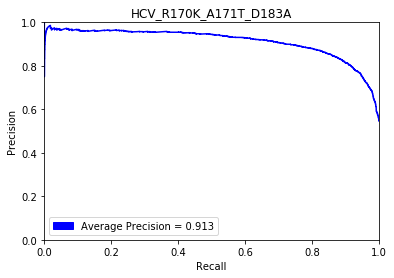

              precision    recall  f1-score   support

     CLEAVED      0.125     0.046     0.067      7514
   UNCLEAVED      0.212     0.443     0.286      4350

    accuracy                          0.191     11864
   macro avg      0.168     0.244     0.177     11864
weighted avg      0.157     0.191     0.148     11864

Normalized confusion matrix
[[0.04604738 0.95395262]
 [0.55747126 0.44252874]]


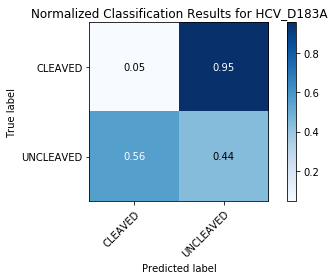

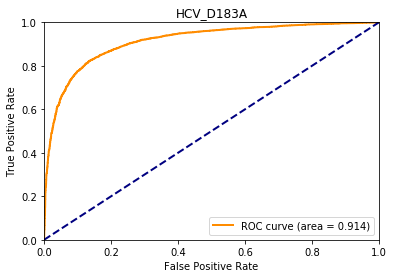

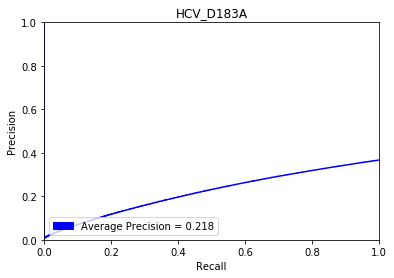

In [12]:
template = "../Results/lr_0.01_epoch_600__gc_[10,10,]_do_0.0_ad_10_ab_3_fc_[]_m_gcn_cheby_deg_3.train_protease_HCV_selector_8_ang_ratio_0_params_3_test_protease_{}_selector_8_ang_ratio_0_params_3.{}.csv"
mutants = ["HCV_A171T", "HCV_R170K_A171T_D183A", "HCV_D183A"]

for m in mutants:
    try:
        pred = template.format(m, "predictions")
        epoch = template.format(m, "epoch")
        analysis.classification_report(pred)
        analysis.plot_confusion_matrix(pred, normalize = True, title = "Normalized Classification Results for {}".format(m))
        analysis.plot_auc(pred, m)
        analysis.plot_aupr(pred, m)
    except:
        pass

In [29]:
# this gets aupr, accuracy, and auc for the testing set (all neighborhood sizes), together and apart
neighborhoods = ["10_ang", "8_ang", "k_nearest"] 
protease = ['HCV', 'HCV_A171T', 'HCV_D183A', 'HCV_R170K_A171T_D183A']
dictionary_acc = {}
dictionary_aupr = {}
dictionary_auc = {}
all_results = os.listdir("../Results")

def is_rel(f,n,p):
    if n in f:
        if f"protease_{p}_selector" in f:
        return True
    return False

# add all individual results
for p in protease:
    acc = []
    auc = []
    aupr = []
    for n in neighborhoods:
        results_relevant = [f for f in all_results if is_rel(f,n,p)]
        if len(results_relevant) != 3:
            print(results_relevant)
            raise ValueError("Parsing is wrong")
        pred = [x for x in results_relevant if "predictions" in x][0]
        acc.append(analysis.classification_report(pred))
        auc.append(analysis.plot_auc(pred))
        aupr.append(analysis.plot_aupr(pred))
    # add all values to each plot
    n_ind = [f"{n} Individual" for n in neighborhoods]
    dictionary_acc[p] = (n_ind, acc)
    dictionary_aupr[p] = (n_ind, aupr)
    dictionary_auc[p] = (n_ind, auc)
    
# add results from group model
for p in protease:
    acc = []
    auc = []
    aupr = []
    for n in neighborhoods:
        results_relevant = [f for f in all_results if is_rel(f,n,p)]
        if len(results_relevant) != 3:
            print(results_relevant)
            raise ValueError("Parsing is wrong")
        pred = [x for x in results_relevant if "predictions" in x][0]
        acc.append(analysis.classification_report(pred, protease = p))
        auc.append(analysis.plot_auc(pred, protease = p))
        aupr.append(analysis.plot_aupr(pred, protease = p))
    # add all values to each plot
    n_ind = [f"{n} Grouped" for n in neighborhoods]
    dictionary_acc[p] = (n_ind, acc)
    dictionary_aupr[p] = (n_ind, aupr)
    dictionary_auc[p] = (n_ind, auc)

In [ ]:
analysis.plot_barchart(dictionary_acc)
analysis.plot_barchart(dictionary_auc)
analysis.plot_barchart(dictionary_aupr)